# BrainStation Capstone Project

## Author: Jason Lew

### Date: 03/06/2024

#### Description: Using machine learning models to predict the outcomes of NHL games

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [2]:
# Load dataset
df = pd.read_csv('hockey_data.csv')

In [3]:
# See the shape
df.shape

(199820, 111)

In [4]:
# Show dtype for all columns
df.info(112)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199820 entries, 0 to 199819
Data columns (total 111 columns):
 #    Column                                     Dtype  
---   ------                                     -----  
 0    team                                       object 
 1    season                                     int64  
 2    name                                       object 
 3    gameId                                     int64  
 4    playerTeam                                 object 
 5    opposingTeam                               object 
 6    home_or_away                               object 
 7    gameDate                                   int64  
 8    position                                   object 
 9    situation                                  object 
 10   xGoalsPercentage                           float64
 11   corsiPercentage                            float64
 12   fenwickPercentage                          float64
 13   iceTime                    

In [5]:
# Check the first 5 rows
df.head()

,team,season,name,gameId,playerTeam,opposingTeam,home_or_away,gameDate,position,situation,...,unblockedShotAttemptsAgainst,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst,playoffGame
0,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,other,...,1.0,1.000,0.0,0.017,0.000,0.000,0.037,0.037,0.037,0
1,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,all,...,31.0,30.369,5.0,0.396,0.168,0.168,2.917,2.833,2.714,0
2,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,5on5,...,20.0,19.369,3.0,0.237,0.168,0.168,1.862,1.777,1.665,0
3,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,4on5,...,9.0,9.000,1.0,0.124,0.000,0.000,0.795,0.795,0.789,0
4,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,5on4,...,1.0,1.000,1.0,0.019,0.000,0.000,0.224,0.224,0.224,0


In [6]:
# Convert old team name abbreviations to new team name abbreviations

# Replace all occurrences of 'S.J' with 'SJS' in the 'team' column
df.loc[:, 'team'] = df['team'].replace('S.J', 'SJS')
df.loc[:, 'opposingTeam'] = df['opposingTeam'].replace('S.J', 'SJS')

# Replace all occurrences of 'ATL' with 'WPG' in the 'team' column
df.loc[:, 'team'] = df['team'].replace('ATL', 'WPG')
df.loc[:, 'opposingTeam'] = df['opposingTeam'].replace('ATL', 'WPG')

# Replace all occurrences of 'T.B' with 'TBL' in the 'team' column
df.loc[:, 'team'] = df['team'].replace('T.B', 'TBL')
df.loc[:, 'opposingTeam'] = df['opposingTeam'].replace('T.B', 'TBL')

# Replace all occurrences of 'L.A' with 'LAK' in the 'team' column
df.loc[:, 'team'] = df['team'].replace('L.A', 'LAK')
df.loc[:, 'opposingTeam'] = df['opposingTeam'].replace('L.A', 'LAK')

# Replace all occurrences of 'N.J' with 'NJD' in the 'team' column
df.loc[:, 'team'] = df['team'].replace('N.J', 'NJD')
df.loc[:, 'opposingTeam'] = df['opposingTeam'].replace('N.J', 'NJD')

In [7]:
# Create the outcome column
df.loc[:, 'outcome'] = df.apply(lambda x: 1 if x['goalsFor'] > x['goalsAgainst'] else 0, axis=1)

In [8]:
# Drop columns

df2 = df.drop(columns=['name','gameId', 'position', 'playerTeam', 'opposingTeam', 'gameDate', 'goalsFor', 'goalsAgainst', 'iceTime'])

In [9]:
# Filter rows where the situation is 'all'
filtered_df = df2[df2['situation'] == 'all']

# Display the filtered dataframe
filtered_df.head()

,team,season,home_or_away,situation,xGoalsPercentage,corsiPercentage,fenwickPercentage,xOnGoalFor,xGoalsFor,xReboundsFor,...,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst,playoffGame,outcome
1,NYR,2008,AWAY,all,0.4596,0.6408,0.6310,37.733,2.287,2.842,...,30.369,5.0,0.396,0.168,0.168,2.917,2.833,2.714,0,1
6,NYR,2008,HOME,all,0.6619,0.6207,0.6190,34.277,1.793,1.872,...,31.984,5.0,0.241,0.000,0.000,1.091,1.117,1.091,0,1
11,NYR,2008,HOME,all,0.4123,0.4904,0.4643,27.924,1.938,1.626,...,43.911,3.0,0.448,0.407,0.407,2.738,2.751,2.730,0,1
16,NYR,2008,AWAY,all,0.5008,0.5000,0.4810,27.100,3.030,1.970,...,38.025,4.0,0.504,0.401,0.401,3.123,2.958,2.907,0,1
21,NYR,2008,HOME,all,0.3114,0.4369,0.4507,21.917,1.562,1.340,...,38.019,3.0,0.383,1.139,1.139,2.698,2.691,2.242,0,1


In [10]:
# Drop situation column
filtered_df = filtered_df.drop(columns=['situation'])
filtered_df

,team,season,home_or_away,xGoalsPercentage,corsiPercentage,fenwickPercentage,xOnGoalFor,xGoalsFor,xReboundsFor,xFreezeFor,...,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst,playoffGame,outcome
1,NYR,2008,AWAY,0.4596,0.6408,0.6310,37.733,2.287,2.842,8.155,...,30.369,5.0,0.396,0.168,0.168,2.917,2.833,2.714,0,1
6,NYR,2008,HOME,0.6619,0.6207,0.6190,34.277,1.793,1.872,9.068,...,31.984,5.0,0.241,0.000,0.000,1.091,1.117,1.091,0,1
11,NYR,2008,HOME,0.4123,0.4904,0.4643,27.924,1.938,1.626,6.208,...,43.911,3.0,0.448,0.407,0.407,2.738,2.751,2.730,0,1
16,NYR,2008,AWAY,0.5008,0.5000,0.4810,27.100,3.030,1.970,5.731,...,38.025,4.0,0.504,0.401,0.401,3.123,2.958,2.907,0,1
21,NYR,2008,HOME,0.3114,0.4369,0.4507,21.917,1.562,1.340,5.845,...,38.019,3.0,0.383,1.139,1.139,2.698,2.691,2.242,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199796,LAK,2015,HOME,0.5891,0.5948,0.5263,29.320,2.927,2.065,6.696,...,39.463,10.0,0.370,0.261,0.261,2.152,2.314,2.307,1,0
199801,LAK,2017,AWAY,0.3588,0.4206,0.4396,27.407,1.275,1.812,7.110,...,52.184,4.0,0.509,0.000,0.000,2.788,2.783,2.733,1,0
199806,LAK,2017,AWAY,0.2912,0.3799,0.3667,31.205,1.907,1.947,7.313,...,75.118,3.0,0.788,0.962,0.962,4.469,4.347,4.234,1,0
199811,LAK,2017,HOME,0.4370,0.5149,0.5258,35.453,2.452,2.430,8.433,...,46.316,6.0,0.506,0.613,0.613,3.051,3.139,3.107,1,0


In [11]:
# Grouping by 'team', 'season', and 'home_or_away' and calculating the mean
average_stats = filtered_df.groupby(['team', 'season', 'home_or_away']).mean().reset_index()

# Printing the resulting DataFrame
average_stats

,team,season,home_or_away,xGoalsPercentage,corsiPercentage,fenwickPercentage,xOnGoalFor,xGoalsFor,xReboundsFor,xFreezeFor,...,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst,playoffGame,outcome
0,ANA,2008,AWAY,0.445117,0.457565,0.448263,27.391250,2.509646,1.815896,5.970708,...,46.648688,4.270833,0.537646,0.581292,0.617313,3.047500,2.971333,2.878750,0.145833,0.395833
1,ANA,2008,HOME,0.544794,0.527317,0.526153,29.912340,2.981064,2.103340,6.513404,...,41.743872,3.510638,0.426766,0.327362,0.329021,2.522851,2.588660,2.507170,0.127660,0.489362
2,ANA,2009,AWAY,0.421376,0.465505,0.455054,28.111317,2.399439,1.901805,6.203268,...,46.120366,5.097561,0.522927,0.493049,0.510415,3.215171,3.148707,3.069488,0.000000,0.243902
3,ANA,2009,HOME,0.498278,0.490039,0.488973,29.033854,2.939341,2.037659,6.330829,...,47.100683,2.853659,0.472488,0.616780,0.640439,2.722902,2.780268,2.668171,0.000000,0.585366
4,ANA,2010,AWAY,0.421764,0.423707,0.435139,26.456955,2.370841,1.845841,5.805955,...,46.999250,5.409091,0.559523,0.605727,0.624955,3.231273,3.151682,3.061477,0.068182,0.431818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,WSH,2021,HOME,0.535791,0.515636,0.522366,31.353545,2.916818,2.213523,7.343500,...,41.592227,4.113636,0.440841,0.537250,0.545409,2.506477,2.593864,2.517818,0.068182,0.409091
973,WSH,2022,AWAY,0.467798,0.487385,0.483468,31.161317,3.071220,2.127756,7.214171,...,44.646634,4.878049,0.498561,0.636976,0.636976,3.375049,3.303171,3.218024,0.000000,0.414634
974,WSH,2022,HOME,0.521244,0.508556,0.510359,32.460927,3.249659,2.216854,7.632561,...,43.908024,4.219512,0.454756,0.528098,0.528098,2.945610,3.040634,2.958244,0.000000,0.390244
975,WSH,2023,AWAY,0.459745,0.466331,0.460455,27.915379,2.771828,1.963828,6.778000,...,44.534069,4.655172,0.500483,0.711207,0.711207,3.049793,2.985621,2.876138,0.000000,0.379310


In [12]:
# Drop playoffGame and outcome column
average_stats.drop(['playoffGame', 'outcome'], axis=1, inplace=True)
average_stats

,team,season,home_or_away,xGoalsPercentage,corsiPercentage,fenwickPercentage,xOnGoalFor,xGoalsFor,xReboundsFor,xFreezeFor,...,scoreAdjustedShotsAttemptsAgainst,unblockedShotAttemptsAgainst,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst
0,ANA,2008,AWAY,0.445117,0.457565,0.448263,27.391250,2.509646,1.815896,5.970708,...,59.201042,47.687500,46.648688,4.270833,0.537646,0.581292,0.617313,3.047500,2.971333,2.878750
1,ANA,2008,HOME,0.544794,0.527317,0.526153,29.912340,2.981064,2.103340,6.513404,...,50.021894,40.914894,41.743872,3.510638,0.426766,0.327362,0.329021,2.522851,2.588660,2.507170
2,ANA,2009,AWAY,0.421376,0.465505,0.455054,28.111317,2.399439,1.901805,6.203268,...,59.154488,46.780488,46.120366,5.097561,0.522927,0.493049,0.510415,3.215171,3.148707,3.069488
3,ANA,2009,HOME,0.498278,0.490039,0.488973,29.033854,2.939341,2.037659,6.330829,...,56.985585,46.585366,47.100683,2.853659,0.472488,0.616780,0.640439,2.722902,2.780268,2.668171
4,ANA,2010,AWAY,0.421764,0.423707,0.435139,26.456955,2.370841,1.845841,5.805955,...,64.189568,48.000000,46.999250,5.409091,0.559523,0.605727,0.624955,3.231273,3.151682,3.061477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,WSH,2021,HOME,0.535791,0.515636,0.522366,31.353545,2.916818,2.213523,7.343500,...,56.458795,40.340909,41.592227,4.113636,0.440841,0.537250,0.545409,2.506477,2.593864,2.517818
973,WSH,2022,AWAY,0.467798,0.487385,0.483468,31.161317,3.071220,2.127756,7.214171,...,58.900610,45.219512,44.646634,4.878049,0.498561,0.636976,0.636976,3.375049,3.303171,3.218024
974,WSH,2022,HOME,0.521244,0.508556,0.510359,32.460927,3.249659,2.216854,7.632561,...,60.940293,42.878049,43.908024,4.219512,0.454756,0.528098,0.528098,2.945610,3.040634,2.958244
975,WSH,2023,AWAY,0.459745,0.466331,0.460455,27.915379,2.771828,1.963828,6.778000,...,62.307862,45.206897,44.534069,4.655172,0.500483,0.711207,0.711207,3.049793,2.985621,2.876138


In [13]:
# Merge the filtered_df with average_stats based on 'team', 'season', and 'home_or_away'
merged_df = pd.merge(filtered_df, average_stats, on=['team', 'season', 'home_or_away'], suffixes=('', '_avg'))
merged_df

,team,season,home_or_away,xGoalsPercentage,corsiPercentage,fenwickPercentage,xOnGoalFor,xGoalsFor,xReboundsFor,xFreezeFor,...,scoreAdjustedShotsAttemptsAgainst_avg,unblockedShotAttemptsAgainst_avg,scoreAdjustedUnblockedShotAttemptsAgainst_avg,dZoneGiveawaysAgainst_avg,xGoalsFromxReboundsOfShotsAgainst_avg,xGoalsFromActualReboundsOfShotsAgainst_avg,reboundxGoalsAgainst_avg,totalShotCreditAgainst_avg,scoreAdjustedTotalShotCreditAgainst_avg,scoreFlurryAdjustedTotalShotCreditAgainst_avg
0,NYR,2008,AWAY,0.4596,0.6408,0.6310,37.733,2.287,2.842,8.155,...,54.487022,42.755556,42.141600,5.711111,0.472556,0.485467,0.501689,2.865244,2.800778,2.731000
1,NYR,2008,AWAY,0.5008,0.5000,0.4810,27.100,3.030,1.970,5.731,...,54.487022,42.755556,42.141600,5.711111,0.472556,0.485467,0.501689,2.865244,2.800778,2.731000
2,NYR,2008,AWAY,0.3672,0.3950,0.3800,27.865,2.103,1.723,6.320,...,54.487022,42.755556,42.141600,5.711111,0.472556,0.485467,0.501689,2.865244,2.800778,2.731000
3,NYR,2008,AWAY,0.5760,0.5370,0.5301,31.380,3.355,2.125,6.913,...,54.487022,42.755556,42.141600,5.711111,0.472556,0.485467,0.501689,2.865244,2.800778,2.731000
4,NYR,2008,AWAY,0.4727,0.5763,0.5455,34.270,2.858,2.279,8.777,...,54.487022,42.755556,42.141600,5.711111,0.472556,0.485467,0.501689,2.865244,2.800778,2.731000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39959,LAK,2020,AWAY,0.3794,0.4545,0.4615,25.273,1.298,1.542,6.215,...,57.159143,43.571429,43.190786,4.000000,0.480214,0.647357,0.656286,2.823464,2.775714,2.712857
39960,LAK,2020,AWAY,0.5713,0.3878,0.4353,26.586,2.345,1.526,6.762,...,57.159143,43.571429,43.190786,4.000000,0.480214,0.647357,0.656286,2.823464,2.775714,2.712857
39961,LAK,2020,AWAY,0.5206,0.4679,0.4881,28.779,2.659,1.859,6.478,...,57.159143,43.571429,43.190786,4.000000,0.480214,0.647357,0.656286,2.823464,2.775714,2.712857
39962,LAK,2020,AWAY,0.1459,0.3761,0.3210,17.798,0.760,1.146,4.349,...,57.159143,43.571429,43.190786,4.000000,0.480214,0.647357,0.656286,2.823464,2.775714,2.712857


In [14]:
# Drop columns without _avg suffix except for specific columns
columns_to_keep = ['team', 'season', 'home_or_away', 'playoffGame', 'outcome']
columns_to_drop = [col for col in merged_df.columns if not col.endswith('_avg') and col not in columns_to_keep]
merged_df.drop(columns_to_drop, axis=1, inplace=True)

merged_df

,team,season,home_or_away,playoffGame,outcome,xGoalsPercentage_avg,corsiPercentage_avg,fenwickPercentage_avg,xOnGoalFor_avg,xGoalsFor_avg,...,scoreAdjustedShotsAttemptsAgainst_avg,unblockedShotAttemptsAgainst_avg,scoreAdjustedUnblockedShotAttemptsAgainst_avg,dZoneGiveawaysAgainst_avg,xGoalsFromxReboundsOfShotsAgainst_avg,xGoalsFromActualReboundsOfShotsAgainst_avg,reboundxGoalsAgainst_avg,totalShotCreditAgainst_avg,scoreAdjustedTotalShotCreditAgainst_avg,scoreFlurryAdjustedTotalShotCreditAgainst_avg
0,NYR,2008,AWAY,0,1,0.447327,0.502244,0.491473,29.652911,2.365133,...,54.487022,42.755556,42.141600,5.711111,0.472556,0.485467,0.501689,2.865244,2.800778,2.731000
1,NYR,2008,AWAY,0,1,0.447327,0.502244,0.491473,29.652911,2.365133,...,54.487022,42.755556,42.141600,5.711111,0.472556,0.485467,0.501689,2.865244,2.800778,2.731000
2,NYR,2008,AWAY,0,0,0.447327,0.502244,0.491473,29.652911,2.365133,...,54.487022,42.755556,42.141600,5.711111,0.472556,0.485467,0.501689,2.865244,2.800778,2.731000
3,NYR,2008,AWAY,0,1,0.447327,0.502244,0.491473,29.652911,2.365133,...,54.487022,42.755556,42.141600,5.711111,0.472556,0.485467,0.501689,2.865244,2.800778,2.731000
4,NYR,2008,AWAY,0,1,0.447327,0.502244,0.491473,29.652911,2.365133,...,54.487022,42.755556,42.141600,5.711111,0.472556,0.485467,0.501689,2.865244,2.800778,2.731000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39959,LAK,2020,AWAY,0,0,0.443857,0.477586,0.472393,28.356571,2.361214,...,57.159143,43.571429,43.190786,4.000000,0.480214,0.647357,0.656286,2.823464,2.775714,2.712857
39960,LAK,2020,AWAY,0,1,0.443857,0.477586,0.472393,28.356571,2.361214,...,57.159143,43.571429,43.190786,4.000000,0.480214,0.647357,0.656286,2.823464,2.775714,2.712857
39961,LAK,2020,AWAY,0,1,0.443857,0.477586,0.472393,28.356571,2.361214,...,57.159143,43.571429,43.190786,4.000000,0.480214,0.647357,0.656286,2.823464,2.775714,2.712857
39962,LAK,2020,AWAY,0,0,0.443857,0.477586,0.472393,28.356571,2.361214,...,57.159143,43.571429,43.190786,4.000000,0.480214,0.647357,0.656286,2.823464,2.775714,2.712857


C:\Users\Jason\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.5911422494682848


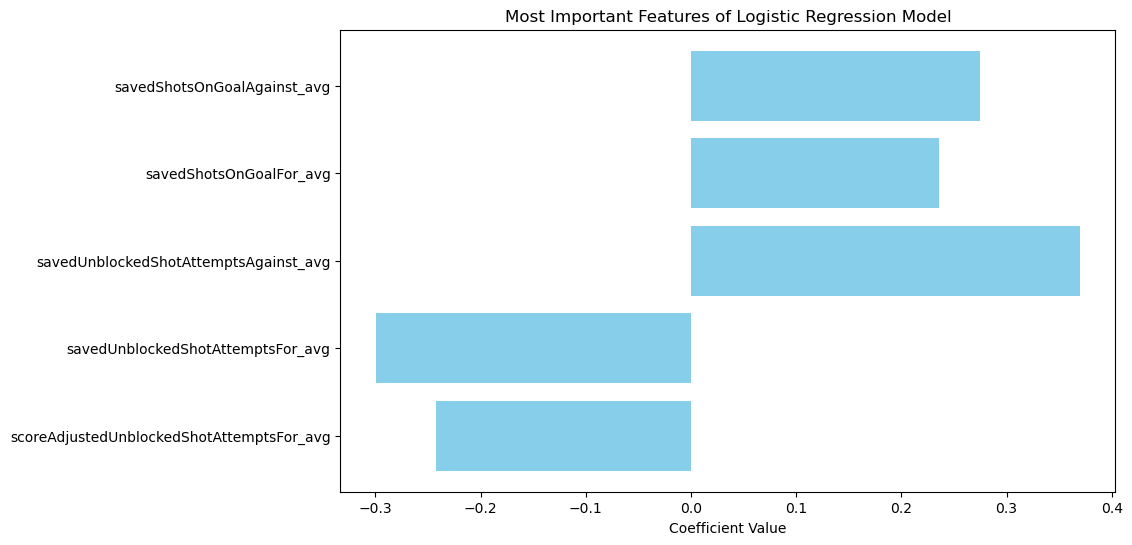

In [15]:
# Baseline Logistic Regression Model

# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(merged_df, columns=['team', 'season', 'home_or_away'])

# Define features (all columns except 'outcome')
features = df_encoded.drop(columns=['outcome'])

# Define target variable
target = df_encoded['outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Get the coefficients and their corresponding feature names
coefficients = model.coef_[0]
feature_names = features.columns

# Create a DataFrame to store coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort coefficients by absolute value and select only the most important features
top_features = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index).head(5)['Feature']

# Plot the coefficients of the top features
plt.figure(figsize=(10, 6))
plt.barh(top_features, coefficients_df.loc[coefficients_df['Feature'].isin(top_features), 'Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Most Important Features of Logistic Regression Model')
plt.show()

Epoch 1/10


C:\Users\Jason\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5668 - loss: 0.6842 - val_accuracy: 0.5748 - val_loss: 0.6753
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 943us/step - accuracy: 0.5864 - loss: 0.6707 - val_accuracy: 0.5650 - val_loss: 0.6753
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 947us/step - accuracy: 0.5854 - loss: 0.6707 - val_accuracy: 0.5715 - val_loss: 0.6745
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 974us/step - accuracy: 0.5981 - loss: 0.6636 - val_accuracy: 0.5753 - val_loss: 0.6732
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 834us/step - accuracy: 0.5956 - loss: 0.6659 - val_accuracy: 0.5733 - val_loss: 0.6733
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 820us/step - accuracy: 0.5964 - loss: 0.6655 - val_accuracy: 0.5764 - val_loss: 0.6750
Epoch 7/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 820us/step - accuracy: 0.5977 - loss: 0.6641 - val_accuracy: 0.5740 - val_loss: 0.6744
Epoch 8/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 815us/step - accuracy: 0.6024 - loss: 0.6612 - val_accuracy:

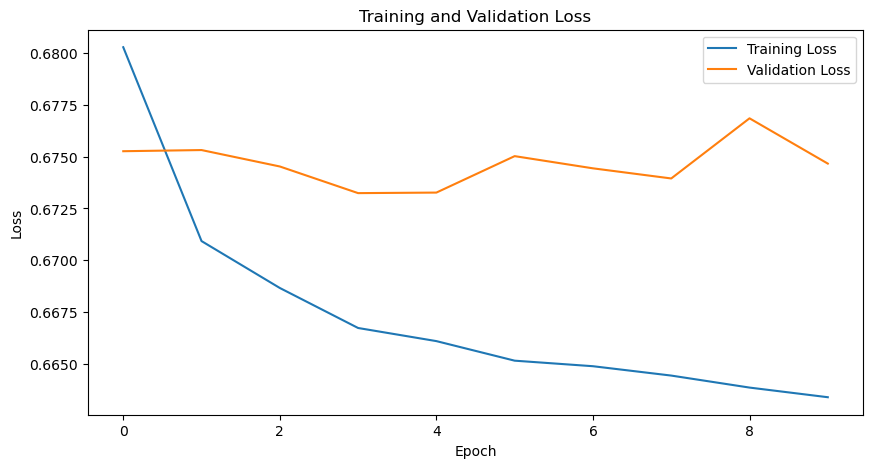

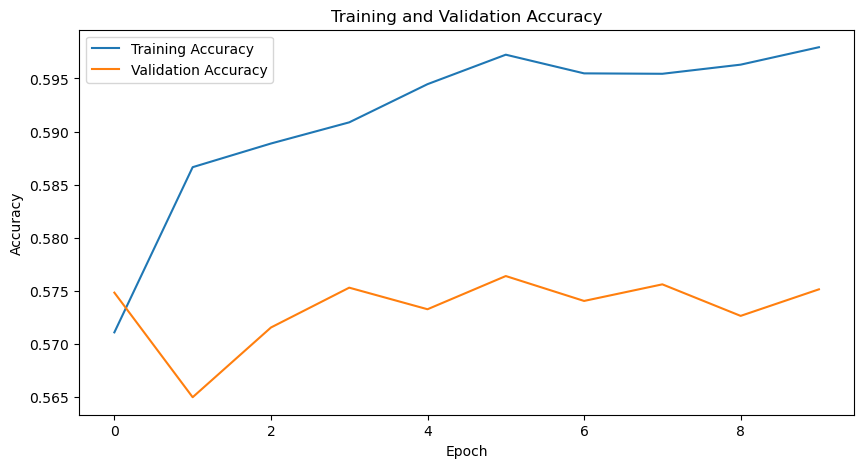

In [16]:
# Baseline Neural Network

# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(merged_df, columns=['team', 'season', 'home_or_away'])

# Define features (all columns except 'outcome')
features = df_encoded.drop(columns=['outcome'])

# Define target variable
target = df_encoded['outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model and capture training history
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

Accuracy: 0.5589891154760416


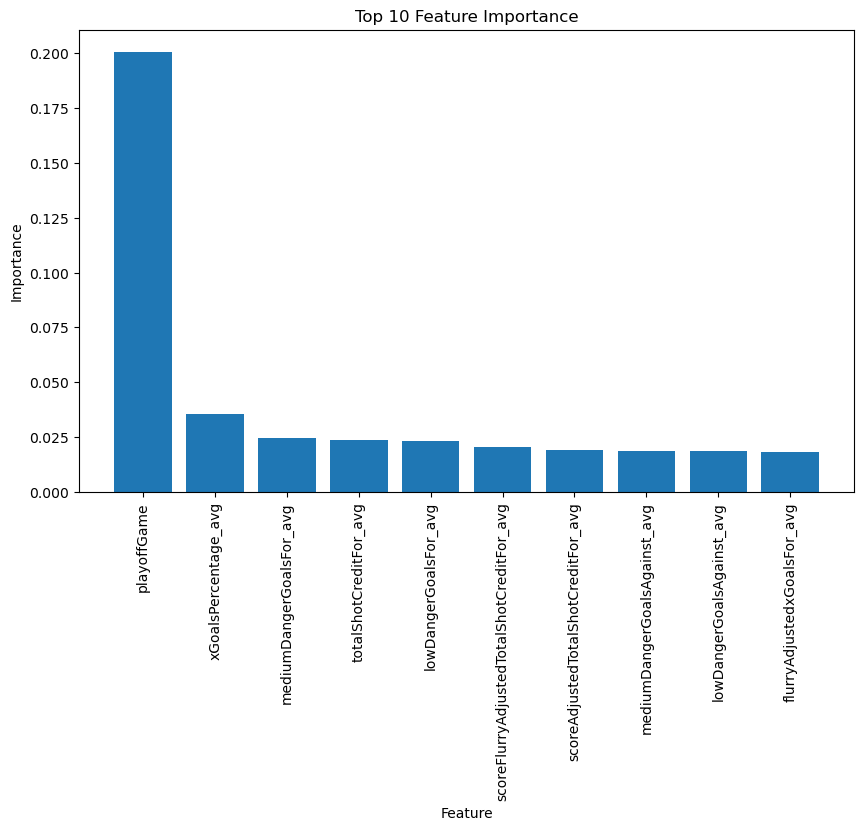

In [17]:
# Baseline Random Forest Classifier

# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(merged_df, columns=['team', 'season', 'home_or_away'])

# Define features (all columns except 'outcome')
features = df_encoded.drop(columns=['outcome'])

# Define target variable
target = df_encoded['outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Get feature importances
importances = rf_classifier.feature_importances_

# Get indices of features sorted by importance
indices = np.argsort(importances)[::-1][:10]  # Select top 10 features

# Get feature names of top 10 features
top_features = features.columns[indices]

# Plot feature importance for top 10 features
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_features)), importances[indices], align='center')
plt.xticks(range(len(top_features)), top_features, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importance')
plt.show()

#### To try and improve the accuracy of our models we will now try and create a ratio between the stats of the first team and the opposing team by dividing their average stats.

In [18]:
# Drop columns but keep 'opposingTeam' column this time

df3 = df.drop(columns=['name','gameId', 'position', 'playerTeam','gameDate', 'goalsFor', 'goalsAgainst', 'iceTime'])
df3

,team,season,opposingTeam,home_or_away,situation,xGoalsPercentage,corsiPercentage,fenwickPercentage,xOnGoalFor,xGoalsFor,...,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst,playoffGame,outcome
0,NYR,2008,TBL,AWAY,other,0.0000,0.0000,0.0000,0.000,0.000,...,1.000,0.0,0.017,0.000,0.000,0.037,0.037,0.037,0,0
1,NYR,2008,TBL,AWAY,all,0.4596,0.6408,0.6310,37.733,2.287,...,30.369,5.0,0.396,0.168,0.168,2.917,2.833,2.714,0,1
2,NYR,2008,TBL,AWAY,5on5,0.4857,0.6429,0.6364,24.802,1.693,...,19.369,3.0,0.237,0.168,0.168,1.862,1.777,1.665,0,0
3,NYR,2008,TBL,AWAY,4on5,0.0482,0.0909,0.1000,0.640,0.034,...,9.000,1.0,0.124,0.000,0.000,0.795,0.795,0.789,0,0
4,NYR,2008,TBL,AWAY,5on4,0.7317,0.9524,0.9444,12.291,0.559,...,1.000,1.0,0.019,0.000,0.000,0.224,0.224,0.224,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199815,LAK,2017,VGK,HOME,other,1.0000,1.0000,1.0000,1.538,0.391,...,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,1,0
199816,LAK,2017,VGK,HOME,all,0.5717,0.6204,0.5802,33.186,2.427,...,36.654,8.0,0.320,0.285,0.285,1.853,2.012,1.976,1,0
199817,LAK,2017,VGK,HOME,5on5,0.5147,0.6200,0.5789,30.926,1.909,...,34.654,7.0,0.299,0.285,0.285,1.814,1.972,1.937,1,0
199818,LAK,2017,VGK,HOME,4on5,0.0000,0.0000,0.0000,0.000,0.000,...,2.000,0.0,0.021,0.000,0.000,0.040,0.040,0.040,1,0


In [19]:
# Filter rows where the situation is 'all'
filtered_df2 = df3[df3['situation'] == 'all']

# Display the filtered dataframe
filtered_df2

,team,season,opposingTeam,home_or_away,situation,xGoalsPercentage,corsiPercentage,fenwickPercentage,xOnGoalFor,xGoalsFor,...,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst,playoffGame,outcome
1,NYR,2008,TBL,AWAY,all,0.4596,0.6408,0.6310,37.733,2.287,...,30.369,5.0,0.396,0.168,0.168,2.917,2.833,2.714,0,1
6,NYR,2008,TBL,HOME,all,0.6619,0.6207,0.6190,34.277,1.793,...,31.984,5.0,0.241,0.000,0.000,1.091,1.117,1.091,0,1
11,NYR,2008,CHI,HOME,all,0.4123,0.4904,0.4643,27.924,1.938,...,43.911,3.0,0.448,0.407,0.407,2.738,2.751,2.730,0,1
16,NYR,2008,PHI,AWAY,all,0.5008,0.5000,0.4810,27.100,3.030,...,38.025,4.0,0.504,0.401,0.401,3.123,2.958,2.907,0,1
21,NYR,2008,NJD,HOME,all,0.3114,0.4369,0.4507,21.917,1.562,...,38.019,3.0,0.383,1.139,1.139,2.698,2.691,2.242,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199796,LAK,2015,SJS,HOME,all,0.5891,0.5948,0.5263,29.320,2.927,...,39.463,10.0,0.370,0.261,0.261,2.152,2.314,2.307,1,0
199801,LAK,2017,VGK,AWAY,all,0.3588,0.4206,0.4396,27.407,1.275,...,52.184,4.0,0.509,0.000,0.000,2.788,2.783,2.733,1,0
199806,LAK,2017,VGK,AWAY,all,0.2912,0.3799,0.3667,31.205,1.907,...,75.118,3.0,0.788,0.962,0.962,4.469,4.347,4.234,1,0
199811,LAK,2017,VGK,HOME,all,0.4370,0.5149,0.5258,35.453,2.452,...,46.316,6.0,0.506,0.613,0.613,3.051,3.139,3.107,1,0


In [20]:
# Drop situation column
filtered_df2 = filtered_df2.drop(columns=['situation'])
filtered_df2

,team,season,opposingTeam,home_or_away,xGoalsPercentage,corsiPercentage,fenwickPercentage,xOnGoalFor,xGoalsFor,xReboundsFor,...,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst,playoffGame,outcome
1,NYR,2008,TBL,AWAY,0.4596,0.6408,0.6310,37.733,2.287,2.842,...,30.369,5.0,0.396,0.168,0.168,2.917,2.833,2.714,0,1
6,NYR,2008,TBL,HOME,0.6619,0.6207,0.6190,34.277,1.793,1.872,...,31.984,5.0,0.241,0.000,0.000,1.091,1.117,1.091,0,1
11,NYR,2008,CHI,HOME,0.4123,0.4904,0.4643,27.924,1.938,1.626,...,43.911,3.0,0.448,0.407,0.407,2.738,2.751,2.730,0,1
16,NYR,2008,PHI,AWAY,0.5008,0.5000,0.4810,27.100,3.030,1.970,...,38.025,4.0,0.504,0.401,0.401,3.123,2.958,2.907,0,1
21,NYR,2008,NJD,HOME,0.3114,0.4369,0.4507,21.917,1.562,1.340,...,38.019,3.0,0.383,1.139,1.139,2.698,2.691,2.242,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199796,LAK,2015,SJS,HOME,0.5891,0.5948,0.5263,29.320,2.927,2.065,...,39.463,10.0,0.370,0.261,0.261,2.152,2.314,2.307,1,0
199801,LAK,2017,VGK,AWAY,0.3588,0.4206,0.4396,27.407,1.275,1.812,...,52.184,4.0,0.509,0.000,0.000,2.788,2.783,2.733,1,0
199806,LAK,2017,VGK,AWAY,0.2912,0.3799,0.3667,31.205,1.907,1.947,...,75.118,3.0,0.788,0.962,0.962,4.469,4.347,4.234,1,0
199811,LAK,2017,VGK,HOME,0.4370,0.5149,0.5258,35.453,2.452,2.430,...,46.316,6.0,0.506,0.613,0.613,3.051,3.139,3.107,1,0


In [21]:
# Rename the home_or_away column in filtered_df to opposite_home_or_away
filtered_df2.rename(columns={'home_or_away': 'opposite_home_or_away'}, inplace=True)

# Merge the dataframes based on opposing team, season, and opposite_home_or_away
merged_df2 = pd.merge(filtered_df2, average_stats, 
                     left_on=['opposingTeam', 'season', 'opposite_home_or_away'], 
                     right_on=['team', 'season', 'home_or_away'], 
                     how='outer')

merged_df2

,team_x,season,opposingTeam,opposite_home_or_away,xGoalsPercentage_x,corsiPercentage_x,fenwickPercentage_x,xOnGoalFor_x,xGoalsFor_x,xReboundsFor_x,...,scoreAdjustedShotsAttemptsAgainst_y,unblockedShotAttemptsAgainst_y,scoreAdjustedUnblockedShotAttemptsAgainst_y,dZoneGiveawaysAgainst_y,xGoalsFromxReboundsOfShotsAgainst_y,xGoalsFromActualReboundsOfShotsAgainst_y,reboundxGoalsAgainst_y,totalShotCreditAgainst_y,scoreAdjustedTotalShotCreditAgainst_y,scoreFlurryAdjustedTotalShotCreditAgainst_y
0,NYR,2008,TBL,AWAY,0.4596,0.6408,0.6310,37.733,2.287,2.842,...,58.261537,44.365854,43.891463,5.292683,0.499244,0.452268,0.457293,2.918073,2.87261,2.798049
1,NYR,2008,TBL,AWAY,0.4752,0.5405,0.5169,32.824,2.359,1.768,...,58.261537,44.365854,43.891463,5.292683,0.499244,0.452268,0.457293,2.918073,2.87261,2.798049
2,PIT,2008,TBL,AWAY,0.5408,0.4783,0.4681,30.798,3.456,2.160,...,58.261537,44.365854,43.891463,5.292683,0.499244,0.452268,0.457293,2.918073,2.87261,2.798049
3,PIT,2008,TBL,AWAY,0.5532,0.4623,0.4713,29.720,4.198,2.267,...,58.261537,44.365854,43.891463,5.292683,0.499244,0.452268,0.457293,2.918073,2.87261,2.798049
4,PHI,2008,TBL,AWAY,0.4112,0.4336,0.4149,26.979,2.537,1.631,...,58.261537,44.365854,43.891463,5.292683,0.499244,0.452268,0.457293,2.918073,2.87261,2.798049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39959,SJS,2020,MIN,HOME,0.4902,0.5152,0.5676,31.043,2.517,1.891,...,55.888097,40.000000,40.736613,2.419355,0.423032,0.326065,0.326065,2.489645,2.55900,2.526419
39960,LAK,2020,MIN,HOME,0.6501,0.5049,0.5357,32.355,3.378,1.921,...,55.888097,40.000000,40.736613,2.419355,0.423032,0.326065,0.326065,2.489645,2.55900,2.526419
39961,LAK,2020,MIN,HOME,0.4164,0.4160,0.4272,30.858,2.605,1.813,...,55.888097,40.000000,40.736613,2.419355,0.423032,0.326065,0.326065,2.489645,2.55900,2.526419
39962,LAK,2020,MIN,HOME,0.6157,0.5143,0.5185,29.907,3.292,2.072,...,55.888097,40.000000,40.736613,2.419355,0.423032,0.326065,0.326065,2.489645,2.55900,2.526419


In [22]:
# Rename team_X column to just team
merged_df2.rename(columns={'team_x': 'team'}, inplace=True)
merged_df2

,team,season,opposingTeam,opposite_home_or_away,xGoalsPercentage_x,corsiPercentage_x,fenwickPercentage_x,xOnGoalFor_x,xGoalsFor_x,xReboundsFor_x,...,scoreAdjustedShotsAttemptsAgainst_y,unblockedShotAttemptsAgainst_y,scoreAdjustedUnblockedShotAttemptsAgainst_y,dZoneGiveawaysAgainst_y,xGoalsFromxReboundsOfShotsAgainst_y,xGoalsFromActualReboundsOfShotsAgainst_y,reboundxGoalsAgainst_y,totalShotCreditAgainst_y,scoreAdjustedTotalShotCreditAgainst_y,scoreFlurryAdjustedTotalShotCreditAgainst_y
0,NYR,2008,TBL,AWAY,0.4596,0.6408,0.6310,37.733,2.287,2.842,...,58.261537,44.365854,43.891463,5.292683,0.499244,0.452268,0.457293,2.918073,2.87261,2.798049
1,NYR,2008,TBL,AWAY,0.4752,0.5405,0.5169,32.824,2.359,1.768,...,58.261537,44.365854,43.891463,5.292683,0.499244,0.452268,0.457293,2.918073,2.87261,2.798049
2,PIT,2008,TBL,AWAY,0.5408,0.4783,0.4681,30.798,3.456,2.160,...,58.261537,44.365854,43.891463,5.292683,0.499244,0.452268,0.457293,2.918073,2.87261,2.798049
3,PIT,2008,TBL,AWAY,0.5532,0.4623,0.4713,29.720,4.198,2.267,...,58.261537,44.365854,43.891463,5.292683,0.499244,0.452268,0.457293,2.918073,2.87261,2.798049
4,PHI,2008,TBL,AWAY,0.4112,0.4336,0.4149,26.979,2.537,1.631,...,58.261537,44.365854,43.891463,5.292683,0.499244,0.452268,0.457293,2.918073,2.87261,2.798049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39959,SJS,2020,MIN,HOME,0.4902,0.5152,0.5676,31.043,2.517,1.891,...,55.888097,40.000000,40.736613,2.419355,0.423032,0.326065,0.326065,2.489645,2.55900,2.526419
39960,LAK,2020,MIN,HOME,0.6501,0.5049,0.5357,32.355,3.378,1.921,...,55.888097,40.000000,40.736613,2.419355,0.423032,0.326065,0.326065,2.489645,2.55900,2.526419
39961,LAK,2020,MIN,HOME,0.4164,0.4160,0.4272,30.858,2.605,1.813,...,55.888097,40.000000,40.736613,2.419355,0.423032,0.326065,0.326065,2.489645,2.55900,2.526419
39962,LAK,2020,MIN,HOME,0.6157,0.5143,0.5185,29.907,3.292,2.072,...,55.888097,40.000000,40.736613,2.419355,0.423032,0.326065,0.326065,2.489645,2.55900,2.526419


In [23]:
# Function to divide columns with the same beginnings
def divide_columns(df):
    divided_df = pd.DataFrame()  # Create a new DataFrame to store the result
    columns_processed = set()  # Keep track of columns already processed to avoid duplication
    for column in df.columns:
        base_name = column[:-2]  # Remove the last two characters (_x or _y) to get the base name
        if base_name not in columns_processed:
            if base_name + '_x' in df.columns and base_name + '_y' in df.columns:
                # Divide columns with the same base name and different endings
                divided_df[base_name] = df[base_name + '_x'] / df[base_name + '_y']
                columns_processed.add(base_name)
    return divided_df

result_df = divide_columns(merged_df2)
result_df

,xGoalsPercentage,corsiPercentage,fenwickPercentage,xOnGoalFor,xGoalsFor,xReboundsFor,xFreezeFor,xPlayStoppedFor,xPlayContinuedInZoneFor,xPlayContinuedOutsideZoneFor,...,scoreAdjustedShotsAttemptsAgainst,unblockedShotAttemptsAgainst,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst
0,0.997855,1.400320,1.375736,1.408093,0.897103,1.578953,1.353039,1.269807,1.518049,1.428056,...,0.620306,0.698736,0.691911,0.944700,0.793199,0.371461,0.367380,0.999632,0.986211,0.969962
1,1.031725,1.181137,1.126970,1.224902,0.925346,0.982262,1.248845,1.207101,1.154607,1.434995,...,0.847128,0.969214,0.946995,0.944700,0.999511,0.685434,0.677903,0.957481,0.946178,0.961742
2,1.174152,1.045214,1.020574,1.149297,1.355657,1.200049,1.018388,0.971951,1.111080,1.241254,...,0.946611,1.126993,1.051229,0.944700,1.123699,0.603624,0.596992,1.104496,1.039473,1.045371
3,1.201074,1.010249,1.027551,1.109069,1.646716,1.259496,0.863423,0.984269,1.152922,1.008730,...,0.918891,1.036833,0.993291,1.322581,1.161757,1.671574,1.653208,1.101754,1.073240,1.080038
4,0.892772,0.947532,0.904585,1.006783,0.995168,0.906148,1.047258,0.966353,1.006777,1.047870,...,1.105961,1.239692,1.254526,0.566820,1.243881,1.320013,1.963731,1.150074,1.149477,1.152232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39959,0.922480,1.093880,1.169391,1.125382,0.902171,0.953994,1.226978,1.194341,1.038872,1.199912,...,1.000249,0.800000,0.891802,0.413333,0.791902,0.432430,0.432430,1.129478,1.185229,1.194576
39960,1.223387,1.072011,1.103670,1.172945,1.210781,0.969128,1.274664,1.232275,1.126170,1.240566,...,0.922379,0.975000,0.968956,0.413333,1.132301,1.226751,1.226751,0.762358,0.756155,0.762740
39961,0.783600,0.883257,0.880134,1.118675,0.933713,0.914643,1.207837,1.123072,1.155551,1.234171,...,1.331446,1.475000,1.469783,1.240000,1.588531,2.873664,2.873664,1.360033,1.352481,1.348945
39962,1.158652,1.091969,1.068234,1.084199,1.179956,1.045307,1.174506,1.182846,1.107644,1.046063,...,0.875893,0.975000,0.930146,0.000000,1.056657,0.874060,0.874060,0.890488,0.859320,0.841507


In [24]:
# Merge result_df with merged_df2
merged_result_df = pd.concat([merged_df2, result_df], axis=1)

# Drop columns ending in "_x" and "_y"
columns_to_drop = [col for col in merged_result_df.columns if col.endswith('_x') or col.endswith('_y')]
final_df = merged_result_df.drop(columns=columns_to_drop)

final_df

,team,season,opposingTeam,opposite_home_or_away,playoffGame,outcome,home_or_away,xGoalsPercentage,corsiPercentage,fenwickPercentage,...,scoreAdjustedShotsAttemptsAgainst,unblockedShotAttemptsAgainst,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst
0,NYR,2008,TBL,AWAY,0,1,AWAY,0.997855,1.400320,1.375736,...,0.620306,0.698736,0.691911,0.944700,0.793199,0.371461,0.367380,0.999632,0.986211,0.969962
1,NYR,2008,TBL,AWAY,0,0,AWAY,1.031725,1.181137,1.126970,...,0.847128,0.969214,0.946995,0.944700,0.999511,0.685434,0.677903,0.957481,0.946178,0.961742
2,PIT,2008,TBL,AWAY,0,1,AWAY,1.174152,1.045214,1.020574,...,0.946611,1.126993,1.051229,0.944700,1.123699,0.603624,0.596992,1.104496,1.039473,1.045371
3,PIT,2008,TBL,AWAY,0,1,AWAY,1.201074,1.010249,1.027551,...,0.918891,1.036833,0.993291,1.322581,1.161757,1.671574,1.653208,1.101754,1.073240,1.080038
4,PHI,2008,TBL,AWAY,0,0,AWAY,0.892772,0.947532,0.904585,...,1.105961,1.239692,1.254526,0.566820,1.243881,1.320013,1.963731,1.150074,1.149477,1.152232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39959,SJS,2020,MIN,HOME,0,0,HOME,0.922480,1.093880,1.169391,...,1.000249,0.800000,0.891802,0.413333,0.791902,0.432430,0.432430,1.129478,1.185229,1.194576
39960,LAK,2020,MIN,HOME,0,0,HOME,1.223387,1.072011,1.103670,...,0.922379,0.975000,0.968956,0.413333,1.132301,1.226751,1.226751,0.762358,0.756155,0.762740
39961,LAK,2020,MIN,HOME,0,0,HOME,0.783600,0.883257,0.880134,...,1.331446,1.475000,1.469783,1.240000,1.588531,2.873664,2.873664,1.360033,1.352481,1.348945
39962,LAK,2020,MIN,HOME,0,1,HOME,1.158652,1.091969,1.068234,...,0.875893,0.975000,0.930146,0.000000,1.056657,0.874060,0.874060,0.890488,0.859320,0.841507


Accuracy: 0.9457178841309823


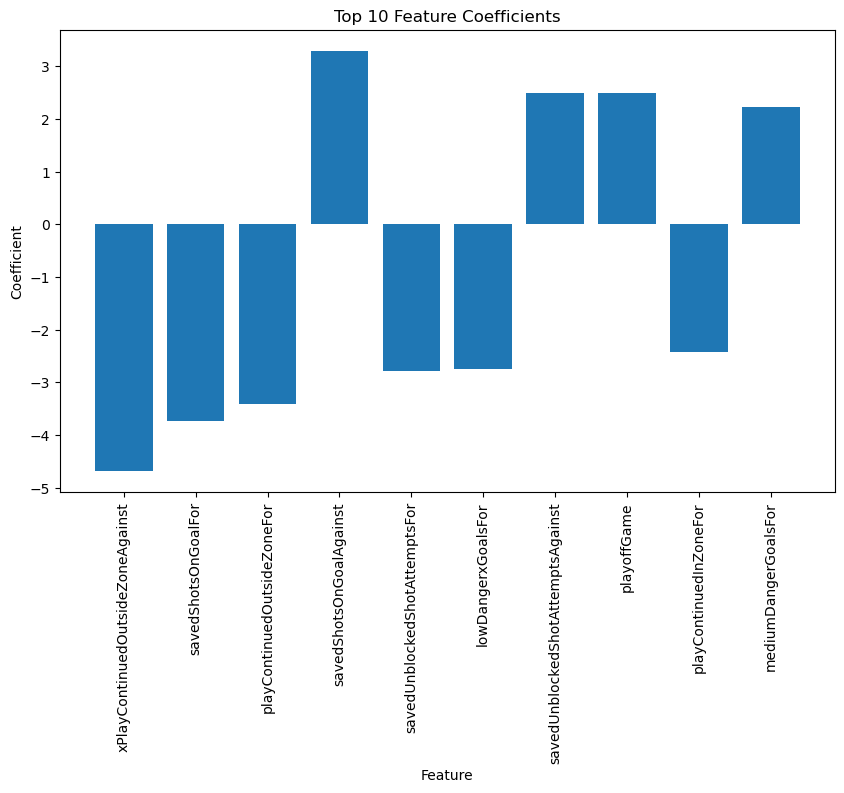

In [25]:
# Improved Logistic Regression Model

# Step 1: Handle NaN and Infinite Values
final_df.replace([np.inf, -np.inf], np.nan, inplace=True)
final_df.dropna(inplace=True)

# Step 2: Encode Categorical Variables
final_df_encoded = pd.get_dummies(final_df, columns=['team', 'opposingTeam', 'opposite_home_or_away', 'home_or_away'])

# Step 3: Split Data into Features and Target
X = final_df_encoded.drop(columns=['outcome'])  # Features
y = final_df_encoded['outcome']  # Target

# Step 4: Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Build Logistic Regression Model
model = LogisticRegression(max_iter=10000)

# Step 6: Train the Model
model.fit(X_train, y_train)

# Step 7: Evaluate the Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Get the coefficients of the logistic regression model
coefficients = model.coef_[0]

# Get the feature names
feature_names = X.columns

# Sort coefficients and feature names by absolute coefficient value
sorted_indices = np.argsort(np.abs(coefficients))[::-1]
sorted_coefficients = coefficients[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the top 10 coefficients
plt.figure(figsize=(10, 6))
plt.bar(range(10), sorted_coefficients[:10], align='center')
plt.xticks(range(10), sorted_feature_names[:10], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Top 10 Feature Coefficients')
plt.show()

Training Accuracy: 1.0
Test Accuracy: 0.9547858942065491


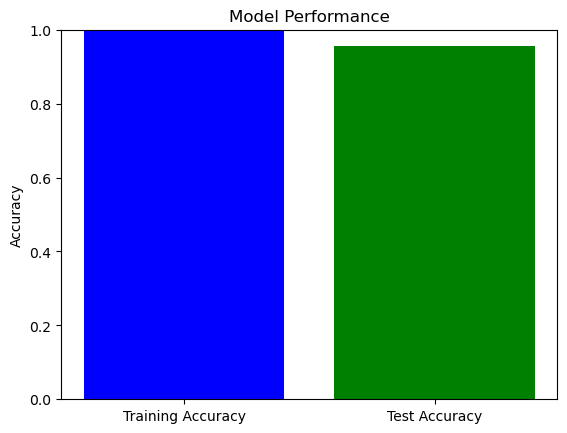

In [26]:
# Improved Neural Network Model

# Step 1: Data Preprocessing
# Encode categorical variables
final_df = pd.get_dummies(final_df, columns=['team', 'opposingTeam', 'home_or_away', 'opposite_home_or_away'])

# Drop irrelevant columns
final_df.drop(columns=['season'], inplace=True)  # Assuming 'season' is irrelevant for prediction

# Drop NaN and infinite values
final_df.replace([np.inf, -np.inf], np.nan, inplace=True)
final_df.dropna(inplace=True)

# Step 2: Data Splitting
X = final_df.drop(columns=['outcome'])  # Features
y = final_df['outcome']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Model Definition
model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)

# Step 5: Model Training
model.fit(X_train_scaled, y_train)

# Step 6: Model Evaluation
y_pred_train = model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)

y_pred_test = model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

# Visualize the performance
plt.bar(['Training Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Model Performance')
plt.ylim(0, 1)  # Set y-axis limits to 0 and 1
plt.show()

Training Accuracy: 1.0
Test Accuracy: 0.8802267002518892


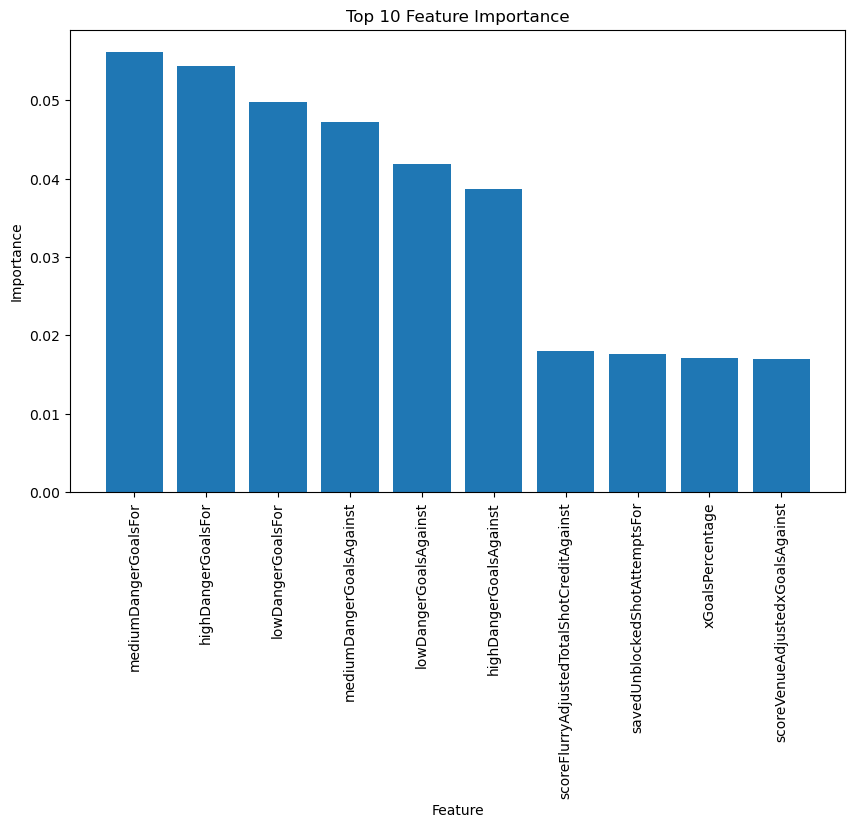

In [28]:
# Improved Random Forest Classifier Model

# Drop NaN and infinite values
final_df.replace([np.inf, -np.inf], np.nan, inplace=True)
final_df.dropna(inplace=True)

# Step 1: Data Splitting
X = final_df.drop(columns=['outcome'])  # Features
y = final_df['outcome']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Model Definition
model = RandomForestClassifier(random_state=42)

# Step 3: Model Training
model.fit(X_train, y_train)

# Step 4: Model Evaluation
train_accuracy = model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

test_accuracy = model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Get feature importances
importances = model.feature_importances_

# Get indices of features sorted by importance
indices = np.argsort(importances)[::-1][:10]  # Select top 10 features

# Get feature names of top 10 features
top_features = X.columns[indices]

# Plot feature importance for top 10 features
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_features)), importances[indices], align='center')
plt.xticks(range(len(top_features)), top_features, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importance')
plt.show()

#### In conclusion we were able to get our Neural Network model to an impressive 95% test accuracy. This is extremely high considering how volatile hockey predictions can be. It will need to be further tested on current NHL games to see if it can maintain its extremly high accuracy.